# XOR 문제
1. 다양한 방법을 사용하여 $XOR$을 구현해 봄
1. $XOR$ 문제를 통해 Deep Neural Network의 작동 방법을 이해함

## 1. 논리연산

- 논리연산은 명제(참, 거짓을 분명하게 판단할 수 있는 문장이나 식)을 대상으로 하는 연산임<br>
$ \ \ $ $\checkmark \ $ 기본 논리연산으로 $AND, OR, NOT$이 있음<br>
$ \ \ $ $\checkmark \ $ 각 기본 연산방법에 따른 연산결과가 약속되어 있음

연산자 |  $ \ \ \ $ 설명 
 :----: |  :---- 
 AND |  $\bullet \ $ 논리곱 
 OR  |  $\bullet \ $ 논리합 
 NOT |  $\bullet \ $ 논리부정 

### 1.1 OR 연산

In [1]:
for i in [True, False]:
    for j in [True, False]:
        print('{} \t OR \t{} \t= \t{}'.format(i, j, i or j))

True 	 OR 	True 	= 	True
True 	 OR 	False 	= 	True
False 	 OR 	True 	= 	True
False 	 OR 	False 	= 	False


### 1.2 AND 연산

In [2]:
for i in [True, False]:
    for j in [True, False]:
        print('{} \t AND \t{} \t= \t{}'.format(i, j, i and j))

True 	 AND 	True 	= 	True
True 	 AND 	False 	= 	False
False 	 AND 	True 	= 	False
False 	 AND 	False 	= 	False


### 1.3 NOT 연산

In [3]:
for i in [True, False]:
        print(' NOT \t{} \t= \t{}'.format(i, not i))

 NOT 	True 	= 	False
 NOT 	False 	= 	True


### 1.4 XOR 연산

- $XOR$문제는 다음과 같은 문제임<br>

$$
XOR \ = \ (\sim AND) \ AND \ (OR)
$$

- $XOR$ 연산 결과는 다음과 같음<br>
$ \ \ $ $\checkmark \ $ python에서 $XOR$ 연산자는 "^"임

In [4]:
for i in [True, False]:
    for j in [True, False]:
        print('{} \t XOR \t{} \t= \t{}'.format(i, j, i ^ j))

True 	 XOR 	True 	= 	False
True 	 XOR 	False 	= 	True
False 	 XOR 	True 	= 	True
False 	 XOR 	False 	= 	False


## 2. Deep Neural Network을 이용한 XOR 계산

### 2.1 XOR연산의 Input과 Output

- XOR연산의 Input은 다음과 같은 2차원 vector 4개임

$$
Z = \begin{bmatrix}
z_1 \\
z_2
\end{bmatrix}
=
\begin{bmatrix}
0 &  0 &  1 &  1 \\
0 &  1 &  0 &  1
\end{bmatrix}
$$

- Output은 Input vector의 순서에 따라 다음과 같음

$$
y = [0, 1, 1, 0]
$$<br>


### 2.2 XOR 연산 구현을 위한 간단한 Deep Neural Network

- 다음과 같은 $XOR$ 구현을 위한 다음과 같은 최소 Network을 생각해 보자<br>
$ \ \  $ $\checkmark \ $ Loss function은 다음과 같음

$$
Loss(W) = \frac{1}{4} \sum_{i=1}^{4} \left( \hat y_i -y_i \right)^2
$$

$\qquad \quad$ 여기서 $\hat y_i$는 주어진 Deep Neural Network을 이용하여 근사화 된 값임

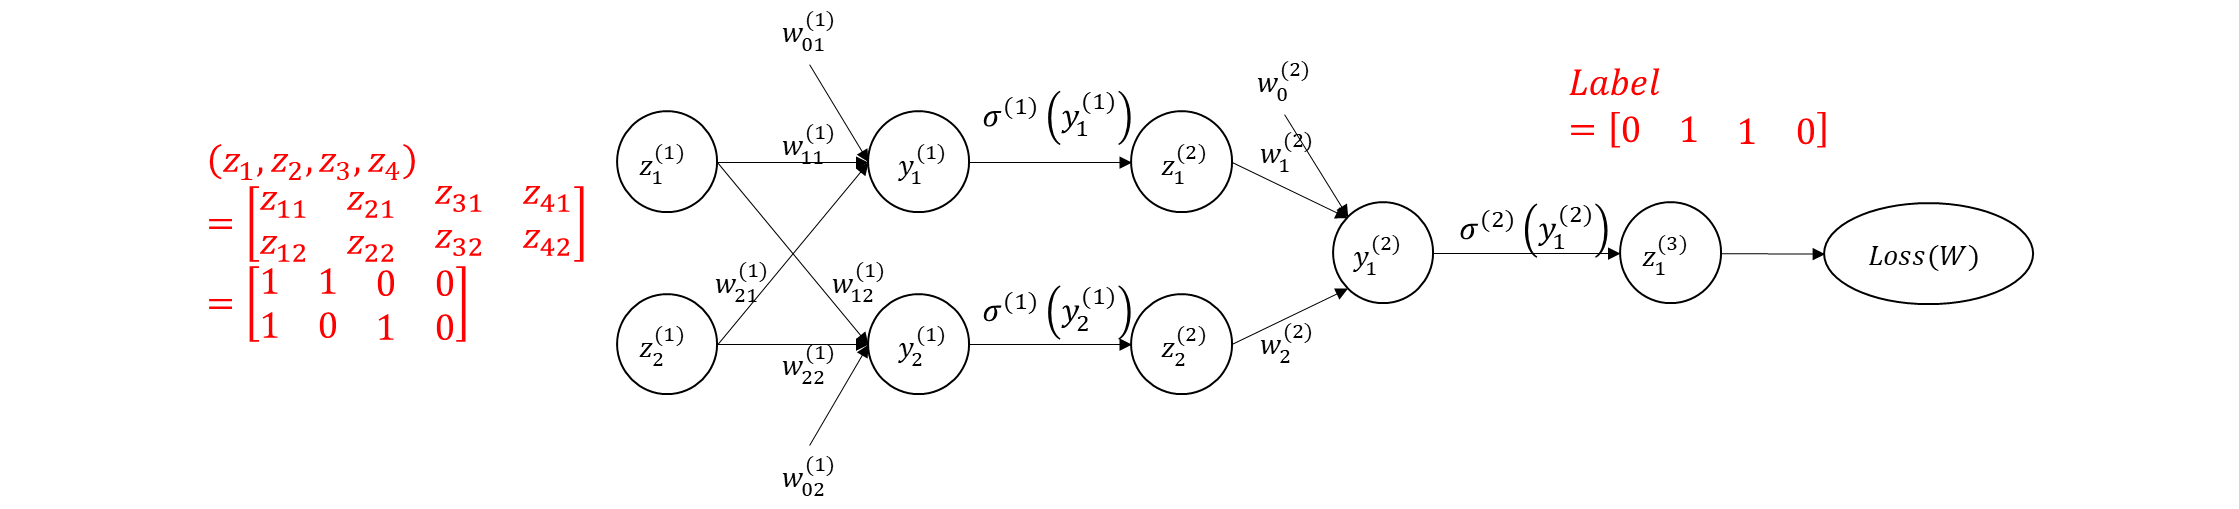

### 2.3 Activation Function의 기능에 대한 이해

- 선형변환(Linear Transformation)된 결과를 비선형변환(Non-linear Transformation)activation function을 이용함<br>
$ \ \ $ $\checkmark \ $ 선형변환: 평면방정식

$$
\begin{align}
y_{1}^{(1)} =& w_{01}^{(1)} + w_{11}^{(1)} z_{1}^{(1)} + w_{21}^{(1)} z_{2}^{(1)} + \varepsilon_{1}^{(1)} \\
\rightarrow \  \hat y_{1}^{(1)} =& \hat w_{01}^{(1)} + \hat w_{11}^{(1)} z_{1}^{(1)} + \hat w_{21}^{(1)} z_{2}^{(1)}
\\\\
y_{2}^{(1)} =&   w_{02}^{(1)} +   w_{12}^{(1)} z_{1}^{(1)} +   w_{22}^{(1)} z_{2}^{(1)} + \varepsilon_{2}^{(1)} 
\\
\rightarrow \  \hat y_{2}^{(1)} =& \hat w_{02}^{(1)} + \hat w_{12}^{(1)} z_{1}^{(1)} + \hat w_{22}^{(1)} z_{2}^{(1)}
\end{align}
$$

$ \qquad $ $\checkmark \ $ 비선형변환: <span style="color:red">휘어진 평면</span>

$$
\begin{align}
z_{1}^{(2)} = \sigma_{1}^{(1)} \left( \hat y_{1}^{(1)} \right) \\\\
z_{2}^{(2)} = \sigma_{2}^{(1)} \left( \hat y_{2}^{(1)} \right)
\end{align}
$$

- 선형변환 결과(hyperplane)에 Activation Function을 적용하면 휘어진 평면(hyperplane)이 만들어짐

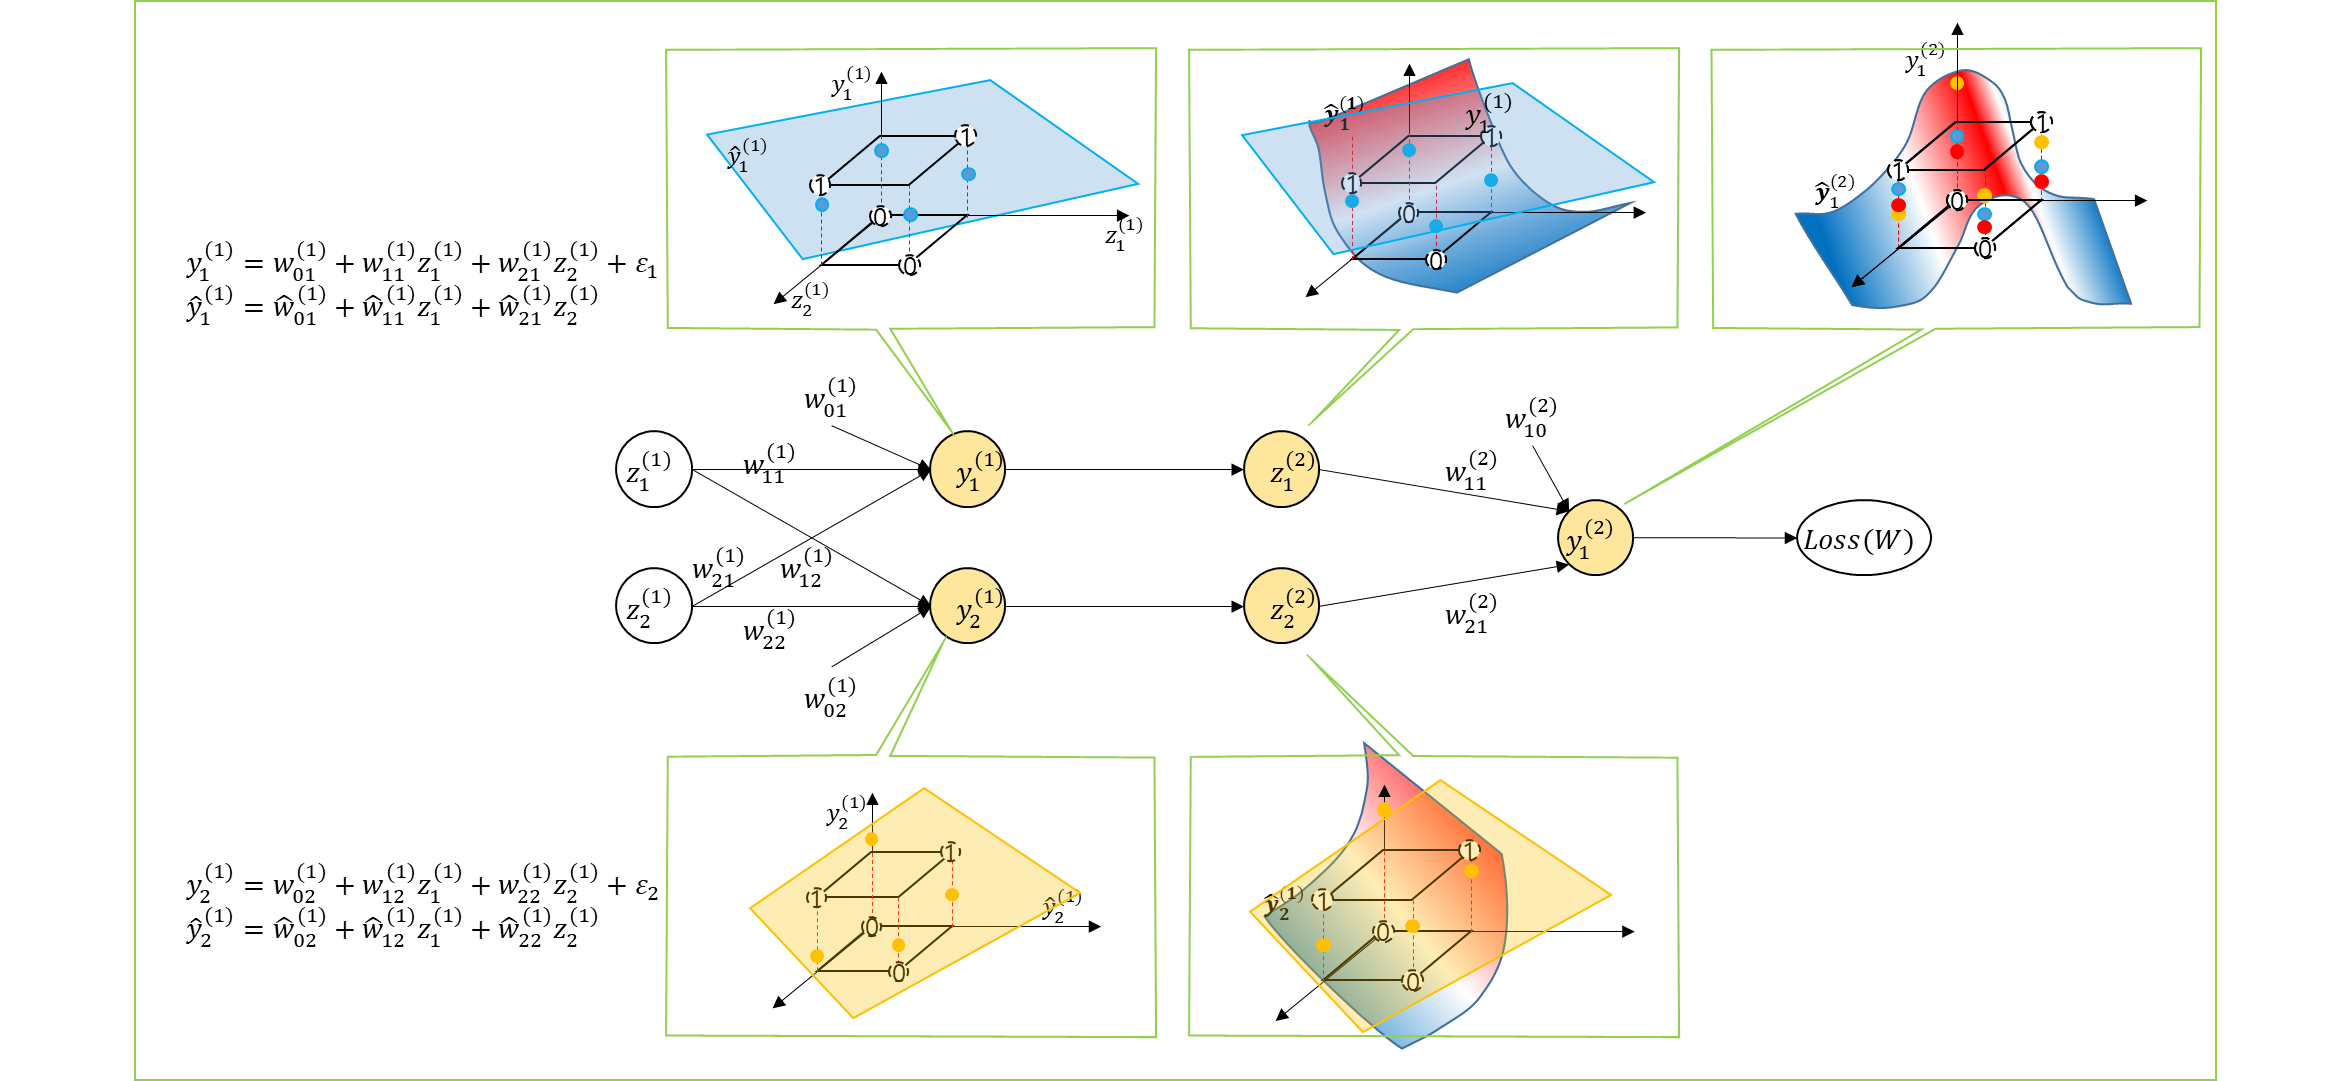

## 3. keras를 사용한 XOR 문제 풀이 

In [5]:
import tensorflow as tf
import numpy as np

# XOR data
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')

history = model.fit(x, y, epochs=3000, batch_size=1)

model.summary()

print(model.predict(x))

Epoch 1/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2678
Epoch 2/3000
4/4 [==============================] - 0s 995us/step - loss: 0.2664
Epoch 3/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2652
Epoch 4/3000
4/4 [==============================] - 0s 999us/step - loss: 0.2640
Epoch 5/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2629
Epoch 6/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2620
Epoch 7/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2612
Epoch 8/3000
4/4 [==============================] - 0s 997us/step - loss: 0.2605
Epoch 9/3000
4/4 [==============================] - 0s 999us/step - loss: 0.2599
Epoch 10/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2594
Epoch 11/3000
4/4 [==============================] - 0s 994us/step - loss: 0.2589
Epoch 12/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2585
Epoch 13/3000
4/4 [====================

4/4 [==============================] - 0s 1ms/step - loss: 0.2541
Epoch 103/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2542
Epoch 104/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2542
Epoch 105/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2541
Epoch 106/3000
4/4 [==============================] - 0s 669us/step - loss: 0.2541
Epoch 107/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2541
Epoch 108/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.2541
Epoch 109/3000
4/4 [==============================] - 0s 999us/step - loss: 0.2541
Epoch 110/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2540
Epoch 111/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2541
Epoch 112/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2541
Epoch 113/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2540
Epoch 114/3000
4/4 [==============

4/4 [==============================] - 0s 1ms/step - loss: 0.2530
Epoch 203/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2529
Epoch 204/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2529
Epoch 205/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2529
Epoch 206/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2528
Epoch 207/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2529
Epoch 208/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.2528
Epoch 209/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2529
Epoch 210/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2528
Epoch 211/3000
4/4 [==============================] - 0s 669us/step - loss: 0.2528
Epoch 212/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.2528
Epoch 213/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2528
Epoch 214/3000
4/4 [===============

4/4 [==============================] - 0s 668us/step - loss: 0.2514
Epoch 303/3000
4/4 [==============================] - 0s 998us/step - loss: 0.2514
Epoch 304/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2513
Epoch 305/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2514
Epoch 306/3000
4/4 [==============================] - 0s 999us/step - loss: 0.2513
Epoch 307/3000
4/4 [==============================] - 0s 669us/step - loss: 0.2513
Epoch 308/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2513
Epoch 309/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2513
Epoch 310/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2513
Epoch 311/3000
4/4 [==============================] - 0s 999us/step - loss: 0.2512
Epoch 312/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2512
Epoch 313/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.2512
Epoch 314/3000
4/4 [========

4/4 [==============================] - 0s 1000us/step - loss: 0.2490
Epoch 403/3000
4/4 [==============================] - 0s 668us/step - loss: 0.2490
Epoch 404/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2490
Epoch 405/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2490
Epoch 406/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2490
Epoch 407/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2489
Epoch 408/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2489
Epoch 409/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2488
Epoch 410/3000
4/4 [==============================] - 0s 998us/step - loss: 0.2488
Epoch 411/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2488
Epoch 412/3000
4/4 [==============================] - 0s 669us/step - loss: 0.2488
Epoch 413/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2487
Epoch 414/3000
4/4 [==============

4/4 [==============================] - 0s 1ms/step - loss: 0.2455
Epoch 503/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.2454
Epoch 504/3000
4/4 [==============================] - 0s 998us/step - loss: 0.2454
Epoch 505/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2453
Epoch 506/3000
4/4 [==============================] - 0s 997us/step - loss: 0.2453
Epoch 507/3000
4/4 [==============================] - 0s 998us/step - loss: 0.2452
Epoch 508/3000
4/4 [==============================] - 0s 999us/step - loss: 0.2451
Epoch 509/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2452
Epoch 510/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2451
Epoch 511/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2451
Epoch 512/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.2450
Epoch 513/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2450
Epoch 514/3000
4/4 [=========

4/4 [==============================] - 0s 1ms/step - loss: 0.2402
Epoch 603/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.2401
Epoch 604/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.2400
Epoch 605/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.2399
Epoch 606/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2399
Epoch 607/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2398
Epoch 608/3000
4/4 [==============================] - 0s 999us/step - loss: 0.2398
Epoch 609/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2397
Epoch 610/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2397
Epoch 611/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2396
Epoch 612/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2395
Epoch 613/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.2394
Epoch 614/3000
4/4 [=========

4/4 [==============================] - 0s 1ms/step - loss: 0.2331
Epoch 703/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2330
Epoch 704/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2330
Epoch 705/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2329
Epoch 706/3000
4/4 [==============================] - 0s 998us/step - loss: 0.2328
Epoch 707/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2327
Epoch 708/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2326
Epoch 709/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.2325
Epoch 710/3000
4/4 [==============================] - 0s 998us/step - loss: 0.2325
Epoch 711/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2324
Epoch 712/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2323
Epoch 713/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.2322
Epoch 714/3000
4/4 [=============

4/4 [==============================] - 0s 1ms/step - loss: 0.2246
Epoch 803/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.2245
Epoch 804/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2243
Epoch 805/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2243
Epoch 806/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2242
Epoch 807/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2241
Epoch 808/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.2240
Epoch 809/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.2239
Epoch 810/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.2238
Epoch 811/3000
4/4 [==============================] - 0s 999us/step - loss: 0.2238
Epoch 812/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2237
Epoch 813/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.2236
Epoch 814/3000
4/4 [======

4/4 [==============================] - 0s 1ms/step - loss: 0.2153
Epoch 903/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.2153
Epoch 904/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2151
Epoch 905/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2151
Epoch 906/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2150
Epoch 907/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2149
Epoch 908/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2148
Epoch 909/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2147
Epoch 910/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.2146
Epoch 911/3000
4/4 [==============================] - 0s 999us/step - loss: 0.2145
Epoch 912/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2145
Epoch 913/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2144
Epoch 914/3000
4/4 [===============

4/4 [==============================] - 0s 1ms/step - loss: 0.2066
Epoch 1003/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2065
Epoch 1004/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2064
Epoch 1005/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.2063
Epoch 1006/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2062
Epoch 1007/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2062
Epoch 1008/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2061
Epoch 1009/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2060
Epoch 1010/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2059
Epoch 1011/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2059
Epoch 1012/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.2058
Epoch 1013/3000
4/4 [==============================] - 0s 667us/step - loss: 0.2057
Epoch 1014/3000
4/4 [======

4/4 [==============================] - 0s 1ms/step - loss: 0.1991
Epoch 1101/3000
4/4 [==============================] - 0s 666us/step - loss: 0.1991
Epoch 1102/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1990
Epoch 1103/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1989
Epoch 1104/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1988
Epoch 1105/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1988
Epoch 1106/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1987
Epoch 1107/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1987
Epoch 1108/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1986
Epoch 1109/3000
4/4 [==============================] - 0s 999us/step - loss: 0.1985
Epoch 1110/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1984
Epoch 1111/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1984
Epoch 1112/3000
4/4 [===

Epoch 1199/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1929
Epoch 1200/3000
4/4 [==============================] - 0s 666us/step - loss: 0.1929
Epoch 1201/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1928
Epoch 1202/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1927
Epoch 1203/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.1927
Epoch 1204/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1926
Epoch 1205/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1926
Epoch 1206/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1925
Epoch 1207/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.1925
Epoch 1208/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.1924
Epoch 1209/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1924
Epoch 1210/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1923
Epoch

4/4 [==============================] - 0s 997us/step - loss: 0.1879
Epoch 1298/3000
4/4 [==============================] - 0s 667us/step - loss: 0.1878
Epoch 1299/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1878
Epoch 1300/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1877
Epoch 1301/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1876
Epoch 1302/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1876
Epoch 1303/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.1876
Epoch 1304/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.1875
Epoch 1305/3000
4/4 [==============================] - 0s 998us/step - loss: 0.1875
Epoch 1306/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.1874
Epoch 1307/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.1874
Epoch 1308/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1874
Epoch 1309/300

4/4 [==============================] - 0s 1ms/step - loss: 0.1836
Epoch 1396/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1835
Epoch 1397/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1835
Epoch 1398/3000
4/4 [==============================] - 0s 997us/step - loss: 0.1835
Epoch 1399/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1834
Epoch 1400/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1834
Epoch 1401/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1834
Epoch 1402/3000
4/4 [==============================] - 0s 999us/step - loss: 0.1833
Epoch 1403/3000
4/4 [==============================] - 0s 999us/step - loss: 0.1833
Epoch 1404/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1832
Epoch 1405/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1832
Epoch 1406/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1831
Epoch 1407/3000
4/4 [=====

4/4 [==============================] - 0s 1ms/step - loss: 0.1797
Epoch 1495/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1797
Epoch 1496/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.1797
Epoch 1497/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1796
Epoch 1498/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.1796
Epoch 1499/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.1795
Epoch 1500/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.1795
Epoch 1501/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1795
Epoch 1502/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1794
Epoch 1503/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1794
Epoch 1504/3000
4/4 [==============================] - 0s 999us/step - loss: 0.1794
Epoch 1505/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1793
Epoch 1506/3000
4/

4/4 [==============================] - 0s 1ms/step - loss: 0.1760
Epoch 1594/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1759
Epoch 1595/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.1759
Epoch 1596/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1758
Epoch 1597/3000
4/4 [==============================] - 0s 998us/step - loss: 0.1758
Epoch 1598/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1757
Epoch 1599/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1757
Epoch 1600/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1757
Epoch 1601/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1756
Epoch 1602/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1756
Epoch 1603/3000
4/4 [==============================] - 0s 998us/step - loss: 0.1755
Epoch 1604/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1755
Epoch 1605/3000
4/4 [====

4/4 [==============================] - 0s 1ms/step - loss: 0.1718
Epoch 1693/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1718
Epoch 1694/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1717
Epoch 1695/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1717
Epoch 1696/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1716
Epoch 1697/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1716
Epoch 1698/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1715
Epoch 1699/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1715
Epoch 1700/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1715
Epoch 1701/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1714
Epoch 1702/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1714
Epoch 1703/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1713
Epoch 1704/3000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.1667
Epoch 1793/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1667
Epoch 1794/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1666
Epoch 1795/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1666
Epoch 1796/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1665
Epoch 1797/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1664
Epoch 1798/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1664
Epoch 1799/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1663
Epoch 1800/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1662
Epoch 1801/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1662
Epoch 1802/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1661
Epoch 1803/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1661
Epoch 1804/3000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.1598
Epoch 1893/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1598
Epoch 1894/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1597
Epoch 1895/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1596
Epoch 1896/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1595
Epoch 1897/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1594
Epoch 1898/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1594
Epoch 1899/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1593
Epoch 1900/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1592
Epoch 1901/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1591
Epoch 1902/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1590
Epoch 1903/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1589
Epoch 1904/3000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.1499
Epoch 1993/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1498
Epoch 1994/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1497
Epoch 1995/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1496
Epoch 1996/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1495
Epoch 1997/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1494
Epoch 1998/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1492
Epoch 1999/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1491
Epoch 2000/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1490
Epoch 2001/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1489
Epoch 2002/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1488
Epoch 2003/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1486
Epoch 2004/3000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.1356
Epoch 2093/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1355
Epoch 2094/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1353
Epoch 2095/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1351
Epoch 2096/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1349
Epoch 2097/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1348
Epoch 2098/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1346
Epoch 2099/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1344
Epoch 2100/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1343
Epoch 2101/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1341
Epoch 2102/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1339
Epoch 2103/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1337
Epoch 2104/3000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.1162
Epoch 2193/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1159
Epoch 2194/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1158
Epoch 2195/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1156
Epoch 2196/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1153
Epoch 2197/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1151
Epoch 2198/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1149
Epoch 2199/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1147
Epoch 2200/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1144
Epoch 2201/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1142
Epoch 2202/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.1140
Epoch 2203/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.1138
Epoch 2204/3000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0934
Epoch 2293/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0932
Epoch 2294/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0929
Epoch 2295/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0927
Epoch 2296/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0925
Epoch 2297/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0923
Epoch 2298/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0920
Epoch 2299/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0918
Epoch 2300/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0916
Epoch 2301/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0914
Epoch 2302/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0911
Epoch 2303/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0909
Epoch 2304/3000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0715
Epoch 2393/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0713
Epoch 2394/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0711
Epoch 2395/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0709
Epoch 2396/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0707
Epoch 2397/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0705
Epoch 2398/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0703
Epoch 2399/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0701
Epoch 2400/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0699
Epoch 2401/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0697
Epoch 2402/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0695
Epoch 2403/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0693
Epoch 2404/3000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0537
Epoch 2493/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0535
Epoch 2494/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 2495/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 2496/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0531
Epoch 2497/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0529
Epoch 2498/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0528
Epoch 2499/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0526
Epoch 2500/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0525
Epoch 2501/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0523
Epoch 2502/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0522
Epoch 2503/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0520
Epoch 2504/3000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0407
Epoch 2593/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0406
Epoch 2594/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0405
Epoch 2595/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0404
Epoch 2596/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0403
Epoch 2597/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0402
Epoch 2598/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0401
Epoch 2599/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0400
Epoch 2600/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0399
Epoch 2601/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0398
Epoch 2602/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0396
Epoch 2603/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0395
Epoch 2604/3000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0316
Epoch 2693/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0316
Epoch 2694/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0315
Epoch 2695/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0314
Epoch 2696/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0313
Epoch 2697/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0313
Epoch 2698/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0312
Epoch 2699/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0311
Epoch 2700/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0310
Epoch 2701/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0310
Epoch 2702/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 2703/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 2704/3000
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0253
Epoch 2793/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0252
Epoch 2794/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0252
Epoch 2795/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0251
Epoch 2796/3000
4/4 [==============================] - 0s 1000us/step - loss: 0.0251
Epoch 2797/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0250
Epoch 2798/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0250
Epoch 2799/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0249
Epoch 2800/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0249
Epoch 2801/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0248
Epoch 2802/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0247
Epoch 2803/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0247
Epoch 2804/3000
4/4 [========

4/4 [==============================] - 0s 2ms/step - loss: 0.0207
Epoch 2893/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0207
Epoch 2894/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0206
Epoch 2895/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0206
Epoch 2896/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0206
Epoch 2897/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0205
Epoch 2898/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0205
Epoch 2899/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0205
Epoch 2900/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0204
Epoch 2901/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0204
Epoch 2902/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0203
Epoch 2903/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0203
Epoch 2904/3000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0174
Epoch 2993/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0173
Epoch 2994/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 2995/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0173
Epoch 2996/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 2997/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0172
Epoch 2998/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 2999/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0172
Epoch 3000/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0171
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                            

## 4. Python Code 구현을 통한 XOR 문제 풀이 

- Library를 이용하지 않은 code구현

### 4.1 Input layer
$$
z^{(1)} = \left(  z_1^{(1)}, z_2^{(1)}, z_3^{(1)}, z_4^{(1)}\right) = 
\begin{bmatrix}
z_{00}^{(1)}          & z_{01}^{(1)}     & z_{02}^{(1)}  & z_{03}^{(1)}    \\
z_{10}^{(1)}          & z_{11}^{(1)}     & z_{12}^{(1)}  & z_{13}^{(1)} 
\end{bmatrix}
=
\begin{bmatrix}
0    & 0  & 1  & 1    \\
0    & 1  & 0  & 1   
\end{bmatrix}
$$

### 4.2 Hidden layer
$$
\begin{align}
& W^{(1)} =
\begin{bmatrix}
w_{11}^{(1)}          & w_{21}^{(1)}      \\
w_{12}^{(1)}          & w_{22}^{(1)}   
\end{bmatrix}, \\
& y_{i}^{(1)} = W^{(1)}z^{(1)} \\
& z_{i}^{(2)} = \sigma \left(y_{i}^{(1)} \right) = \frac{1}{1+e^{y_{i}^{(1)} }}, i=1,2 \\ \\
& W^{(2)} = \left( w_{11}^{(2)},    w_{21}^{(2)} \right) \\  
& y_{i}^{(2)} = W^{(2)}z^{(2)} 
\end{align}
$$

### 4.3 Output layer
$$
y^{(OUT)}  = z_{1}^{(3)} = \sigma \left(y_{1}^{(2)} \right) = \frac{1}{1+e^{- y_{1}^{(2)} }}
$$

### 4.4 Loss function
$$
\begin{align}
& Label \ vector: \ y = \left( y_0, y_1, y_2, y_3 \right) \\ \\
& Loss(W) = - \frac{1}{4} \sum_{i=1}^{4} \left[ y_i log{\hat y_i} + \left( 1-y_i \right) log{\left( 1- \hat y_i \right)}   \right ]
\end{align}
$$

#### (i)  Input과 Label

In [6]:
import numpy as np

Z1 = np.array([0, 0, 1, 1, 0, 1, 0, 1]).reshape(2,4)
y = np.array([0, 1, 1, 0]).reshape(1,4)

print(Z1)
print(y)

[[0 0 1 1]
 [0 1 0 1]]
[[0 1 1 0]]


####  (ii) 파라미터 $W$ 초기화

In [7]:
def init_random_parameters (num_hidden = 2, deviation = 5):

    W1  = np.random.rand(2,num_hidden)*deviation
    w10 = np.random.random((num_hidden,1))*deviation
    W2  = np.random.rand(num_hidden,1)*deviation
    w20 = np.random.random((1,1))*deviation
    return W1, w10, W2, w20

W1, w10, W2, w20 = init_random_parameters()

#### (iii)  Hidden layer Matrix 표현

In [8]:
def affine (W, Z, w0):
    return np.dot(W.T, Z) + w0

def sigmoid (y):
    return 1./(1+np.exp(-1*y))

y1 = affine(W1,Z1,w10)
Z2 = sigmoid(y1)
print(Z2)

[[0.85361927 0.98675908 0.9774695  0.99819959]
 [0.99272369 0.99835523 0.99847008 0.99965571]]


####  (iv) Output layer

In [9]:
y2 = affine(W2,Z2, w20)
y_hat = sigmoid(y2)
print(y_hat)

[[0.99995422 0.99997376 0.99997275 0.99997502]]


####  (v)  Loss 구하기

In [10]:
def loss_eval (_params):

    W1, w10, W2, w20 = _params

    # Forward: input Layer
    y1 = affine(W1, Z1, w10)
    Z2  = sigmoid(y1)

    # Forward: Hidden Layer
    y2 = affine(W2, Z2, w20)
    y_hat = sigmoid(y2)

    loss = 1./Z1.shape[1] * np.sum(-1 * (y * np.log(y_hat) + (1-y) * np.log(1-y_hat)))
    return y1, Z2, y2, y_hat, loss

loss_eval ([W1, w10, W2, w20])[-1]

5.147304406213538

####  (vi) Loss에 대한 parameter 편미분을 이용한 parameter update
$$
w_{ij}^{(l)} = w_{ij}^{(l)} - \rho \left( \frac{\partial Loss \left( w_{ij}^{(l)} \right)}{\partial w_{ij}^{(l)}} \right)
$$

In [11]:
def get_gradients (_params):

    W1, w10, W2, w20 = _params
    m = Z1.shape[1]

    y1, Z2, y2, y_hat, loss = loss_eval([W1, w10, W2, w20])

    # BackPropagate: Hidden Layer
    dW2 = np.dot(Z2, (y_hat-y).T)
    dw20 = 1. / 4. * np.sum(y_hat-y, axis=1, keepdims=True)    
    dZ2  = np.dot(W2, y_hat-y)

    # BackPropagate: Input Layer
    dy1 = dZ2 * Z2 * (1-Z2)
    dW1 = np.dot(Z1, dy1.T)
    dw10 = 1. / 4. * np.sum(dy1, axis=1, keepdims=True)

    return [dW1, dw10, dW2, dw20], loss

####  (vii) Backpropagation을 통한 Training
- Learning Rate: $\rho = 0.1$
- Iteration: 1000

In [12]:
def optimize (_params, learning_rate = 0.1, iteration = 1000, sample_size = 0):

    params = np.copy(_params)

    loss_trace = []

    for epoch in range(iteration):

        dparams, loss = get_gradients(params)

        for param, dparam in zip(params, dparams):
            param += - learning_rate * dparam

        if (epoch % 100 == 0):
            loss_trace.append(loss)

    _, _, _, y_hat_predict, _ = loss_eval(params)

    return params,loss_trace, y_hat_predict


####  (viii) 실행

In [13]:
params = init_random_parameters(2)
new_params, loss_trace, y_hat_predict = optimize(params, 0.1, 1000, 0)
print(y_hat_predict)
print(new_params)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

#### (iX)  ${Loss}$의 변화 Graph

In [ ]:
import matplotlib.pyplot as plt

params = init_random_parameters(2, 0.1)
new_params, loss_trace, y_hat_predict = optimize(params, 0.1, 100000)
print(y_hat_predict)
# Plot learning curve (with costs)
plt.plot(loss_trace)
plt.ylabel('loss')
plt.xlabel('iterations (per hundreds)')
plt.show()

### 과제 1:$tanh()$ Activation function을 사용한 $XOR$을 학습시키는 code를 작성하시오

#### [생각해보기]

- 다음과 같은 Deep Neural Network이 작동되는 과정이 머리에 그려지는가?

$\quad$ (i) $n_{_0}$개의 Component를 가지는 Input vector<br>
$\quad$ (ii) $l^{th}$ Hidden layer에 선형변환된 $n_l$개의 node  <br>
$\quad$ (iii) $l^{th}$ Hidden Layer에서 Input $z_i^{(l)}$ node와 선형변환된 $y_j^{(l)}$ Node를 연결하는 $w_{i,j}^{(l)}$ parameter <br>
$\quad$ (iv) $L$개의 Hidden Layer <br>
$\quad$ (v)  마지막 비선형 변환된 Node: $z^{(L+1)}$<br>
$\quad$ (vi)  Loss Function $Loss(W)$